In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.initializers import GlorotNormal
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input, Dense, Dropout, Lambda, LeakyReLU
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import backend as K
from matplotlib import pyplot as plt

2025-05-15 12:52:04.303018: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-15 12:52:04.438021: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE3 SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

In [2]:
chemicas = ['C','Si','Mn','Cr','Ni','Mo','Ti','Cu','Al','V','Nb','Co','W','Fe','Zr','Be','Sb','Mg','Zn','S','P','Pb','Sn','Cd','Ca','Bi','Ag','Ga','Sc','Au','Tl','Nd','La','Y','Gd','Ge','Ta','Ce','B','Hf']

In [22]:
data = pd.read_csv("../datasets/final_dataset.csv")

In [23]:
X = data.drop(columns=(chemicas+['Sample', 'Device', 'Folder', 'Temp'])).values
y = data[chemicas].values

mask = np.ones(y.shape[0], dtype=bool)
mask[np.where(np.all(y == 0, axis=1))[0]] = False
y = y[mask]
X = X[mask]

def norm(data):
    row_sums = data.sum(axis=1, keepdims=True)
    row_sums[row_sums == 0] = 1
    return data / row_sums

y_scaled = norm(y)
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# np.savetxt("/tmp/check.txt", y, fmt='%.6f')
# print(y_scaled)

In [38]:
num_chemicas = len(chemicas)

inputs = Input(shape=(X.shape[1],))
x = Dense(2048, activation='sigmoid')(inputs)
# x = Dropout(0.1)(x)
outputs = Dense(num_chemicas, activation='sigmoid')(x)

model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam',
              loss='mse',
              metrics=['mae'])

In [39]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',  # Метрика для мониторинга (обычно val_loss)
    factor=0.1,  # Коэффициент уменьшения скорости обучения (new_lr = lr * factor)
    patience=3,  # Количество эпох без улучшений, после которого уменьшаем lr
    verbose=1,  # Выводить сообщения при уменьшении lr
    min_lr=1e-12  # Минимальное значение скорости обучения
)

history = model.fit(X_train, y_train, 
          validation_data=(X_test, y_test),
          epochs=50,
          batch_size=32,
          callbacks=[reduce_lr])

Epoch 1/50
198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0228 - mae: 0.0495 - val_loss: 0.0037 - val_mae: 0.0112 - learning_rate: 0.0010
Epoch 2/50
198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0035 - mae: 0.0101 - val_loss: 0.0022 - val_mae: 0.0098 - learning_rate: 0.0010
Epoch 3/50
198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0018 - mae: 0.0076 - val_loss: 0.0012 - val_mae: 0.0062 - learning_rate: 0.0010
Epoch 4/50
198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0011 - mae: 0.0059 - val_loss: 0.0011 - val_mae: 0.0055 - learning_rate: 0.0010
Epoch 5/50
198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 9.7498e-04 - mae: 0.0054 - val_loss: 7.7387e-04 - val_mae: 0.0054 - learning_rate: 0.0010
Epoch 6/50
198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 6.9349e-04 - mae: 0.0051 - val_loss: 6.8972e-04 - val_mae: 0.0048 - learning_rate: 0.0010
Epoch 7/50
198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 6.9112e-04 - mae: 0.0049 - val_loss: 4.9167e-04 - val_mae: 0.0053 - lear

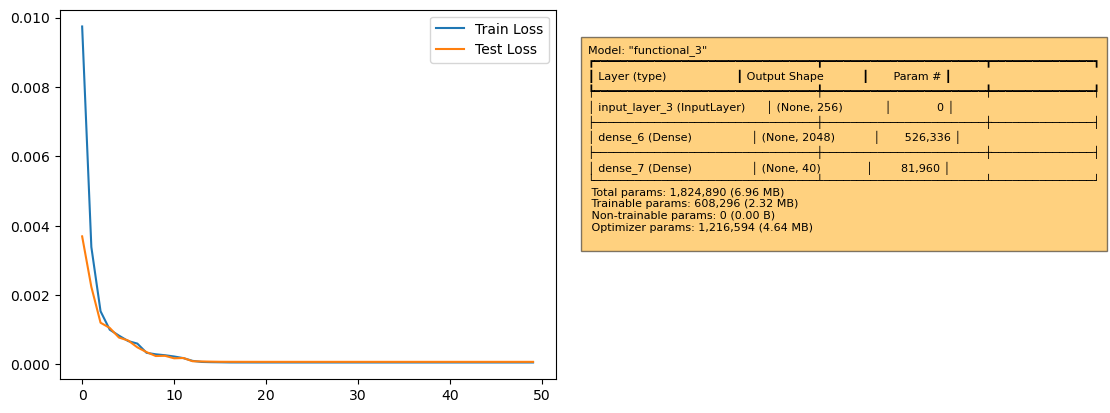

In [40]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend()

model_summary = []
model.summary(print_fn=lambda x: model_summary.append(x))
model_summary_str = '\n'.join(model_summary)

plt.figtext(0.95, 0.60, model_summary_str, ha="left", va="center", fontsize=8, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


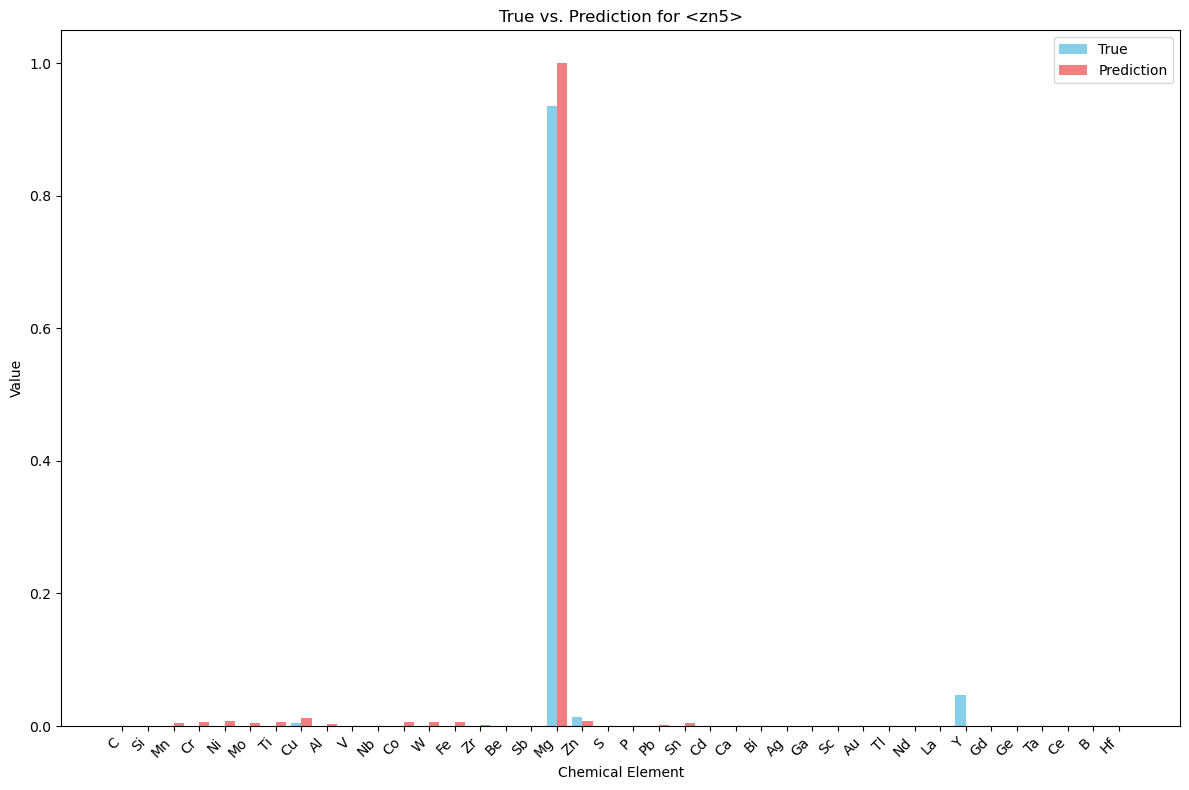

In [42]:
arr_num = 4319

# --------------------------------------------------------
question = X_scaled[arr_num].reshape((1, X.shape[1]))
y_true = y_scaled[arr_num]
y_pred = model.predict(question)[0]

categories = np.array(chemicas)

plt.figure(figsize=(12, 8))

bar_width = 0.4

x_pos = np.arange(len(categories))

plt.bar(x_pos - bar_width / 2, y_true, bar_width, label="True", color='skyblue')
plt.bar(x_pos + bar_width / 2, y_pred, bar_width, label="Prediction",
         color='lightcoral')

plt.ylabel('Value')
plt.xlabel('Chemical Element')
plt.title(f'True vs. Prediction for <{ data["Sample"].iloc[arr_num] }>')

plt.xticks(x_pos, categories, rotation=45, ha="right")

plt.legend()

plt.tight_layout()
plt.show()

In [28]:
print(np.around(y_pred,2))
print(np.around(y_true,2))

[0.   0.   0.   0.   0.   0.   0.   0.15 1.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.01 0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
[ 0.   0.4  0.7  0.   0.   0.   0.   4.2 91.8  0.   0.   0.   0.   0.3
  0.   0.   0.   2.   0.6  0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. ]


In [30]:
error_vectors = []
num_samples = len(X_scaled)

for index in range(num_samples):
  question = X_scaled[index].reshape((1,256))
  answer = y_scaled[index]

  prediction = model.predict(question)[0]

  loss_value = tf.keras.losses.MeanSquaredError()(answer, prediction)

  error_vectors.append((index, loss_value.numpy())) # Убираем batch dimension у question

# Сортируем векторы по убыванию ошибки
error_vectors.sort(key=lambda x: x[1], reverse=True)

# Возвращаем только `num_vectors` векторов с наибольшей ошибкой
print(error_vectors[:10])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━